## Bounty : Sentiment Analysis with Python Project

_A python project to implement Sentiment Analysis on the IMDB user reviews of a selected movie._

### Data Acquisition

In [26]:
# Importing necessary packages
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time

# IMDB title code of the movie, can be changed to get analysis of a different movie
movie_id = "tt15671028"

# url for the IMDB reviews of  the movie 'No Hard Feelings (2023)' 
url = f"https://www.imdb.com/title/{movie_id}/reviews/"

# open the url and wait for the page to load
driver = webdriver.Chrome()
driver.get(url)
time.sleep(10)

# get the movie title from the loaded webpage
movie_title = driver.find_element(By.CSS_SELECTOR, 'div.parent h3 a').text

# Scroll to the end of the page
while True:
    # Get current scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")
    
    # Scroll down to the bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Wait to load page
    time.sleep(3)
    
    # Calculate new scroll height and compare with the last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break  # If no new content is loaded, exit the loop
    
# Find and click the "Load More" button until all reviews are loaded and button is no longer available
while True:
    try:
        load_more_button = driver.find_element(By.CSS_SELECTOR, "button#load-more-trigger") # find the button by its id
        load_more_button.click() # click the button 
        time.sleep(20)  # Allow time for new reviews to load
    except Exception as e:
        break
        
# Get the page source
page_source = driver.page_source

# Close the WebDriver
driver.quit()

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(page_source, 'html.parser')

In [27]:
# Find all elements containing review titles
title_elements = soup.find_all("a", class_="title")

# Extract only the titles from the title elements
review_titles = [title.get_text(strip=True) for title in title_elements]

# Print the number of review titles found
print(f"Titles length: {len(review_titles)}")

Titles length: 487


### Data Processing and Cleaning

In [28]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Tokenization and preprocessing
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove punctuation and lowercase
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# Preprocess all review titles
preprocessed_titles = [preprocess_text(title) for title in review_titles]

### Sentiment Analysis Implementation

In [29]:
# Importing needed package
from nltk.sentiment import SentimentIntensityAnalyzer

# Sentiment analysis
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review title
sentiment_scores = []
for title in preprocessed_titles:
    sentiment = sia.polarity_scores(" ".join(title))
    sentiment_scores.append(sentiment)

### Results Visualization

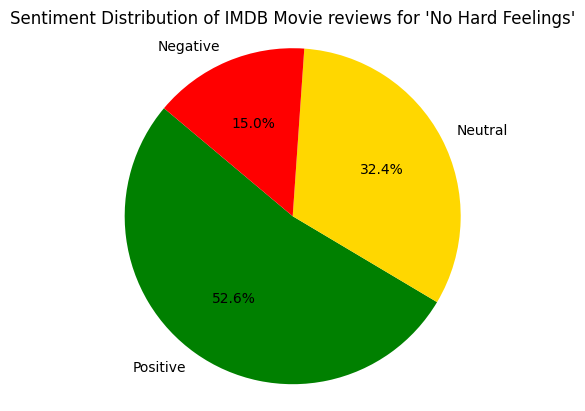

In [30]:
# Pie Chart Visualisation
# Importing matplotlib for visualisation
import matplotlib.pyplot as plt

# Calculate sentiment distribution
positive = sum(1 for score in sentiment_scores if score['compound'] > 0.2)
neutral = sum(1 for score in sentiment_scores if -0.2 <= score['compound'] <= 0.2)
negative = sum(1 for score in sentiment_scores if score['compound'] < -0.2)

# Create a pie chart to visualize sentiment distribution
labels = ['Positive', 'Neutral', 'Negative']
sizes = [positive, neutral, negative]
colors = ['green', 'gold', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title(f"Sentiment Distribution of IMDB Movie reviews for '{movie_title}'")
plt.show()


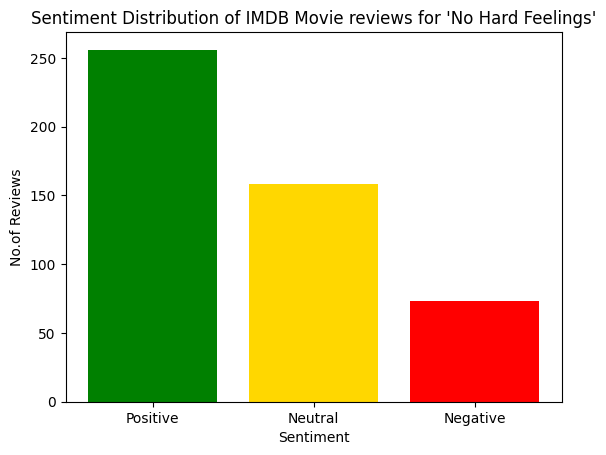

In [34]:
# Bar Graph Visualisation
# Data for sentiment distribution
sentiments = ['Positive', 'Neutral', 'Negative']
counts = [positive, neutral, negative]

# Create a bar chart for sentiment distribution
plt.bar(sentiments, counts, color=['green', 'gold', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('No.of Reviews')
plt.title(f"Sentiment Distribution of IMDB Movie reviews for '{movie_title}'")
plt.show()

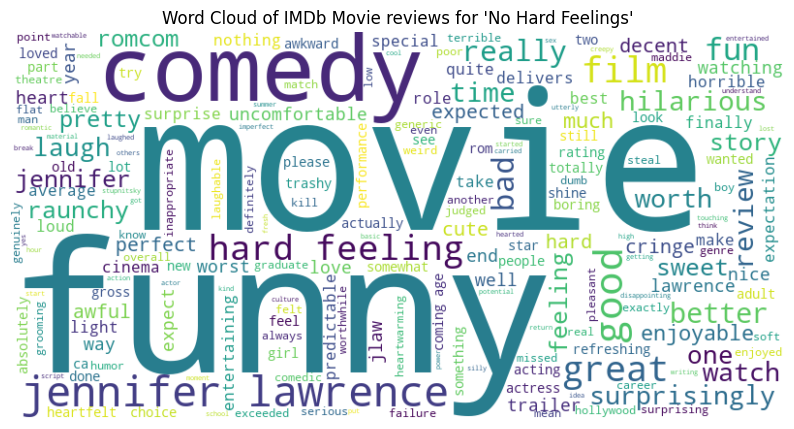

In [32]:
# install wordcloud for this visualisation
!pip install wordcloud
# import the library
from wordcloud import WordCloud

# Combine all preprocessed titles into a single string
all_titles = ' '.join([' '.join(title) for title in preprocessed_titles])

# Generate a word cloud based on titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud of IMDb Movie reviews for '{movie_title}'")
plt.show()


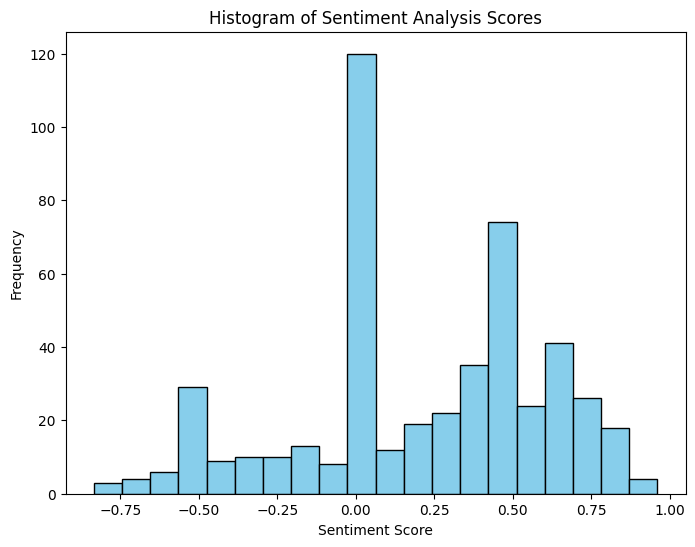

In [33]:
# Extract sentiment scores for polarity (compound)
polarity_scores = [score['compound'] for score in sentiment_scores]

# Create a histogram for sentiment analysis scores
plt.figure(figsize=(8, 6))
plt.hist(polarity_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sentiment Analysis Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## Project Summary

As part of the stackup bounty, I have created this Jupyter notebook script which performs sentiment analysis on IMDb movie reviews using Selenium for web scraping, BeautifulSoup for HTML parsing, NLTK for text preprocessing, and Matplotlib for data visualization.\
Sentiment analysis allows for a quantitative understanding of the emotional tone expressed in the IMDb movie reviews.
It helps categorize each review as positive, negative, or neutral, providing valuable insights into the audience's perception of the movie.

The various steps in the project are :

**Step 1 : Webscraping IMDB movie reviews for a particular movie ID**

- Selenium is used to automate the Chrome browser and open the IMDb reviews page for a specific movie (identified by its IMDb title code).
- I had to write a loop to execute scripts that scrolls to the end of the page to get access to the "Load more" button.
- Then run a loop to click the "Load More" button repeatedly until all reviews are loaded. The button is selected from the page using a css selector with the button's id.
- Since there maybe some delays in loading reviews and the page, calls to the sleep() function are needed to ensure all reviews are loaded.

**Step 2: Text Preprocessing**

- BeautifulSoup is employed to parse the HTML content of the page. The page content loaded in the previous step is parsed this way.
- Review titles are extracted using CSS selectors. I have chosen to only extract the review titles instead of the whole reviews because the titles convey the sentiment of the user more prominently than the lengthy reviews itself.
- NLTK is used for tokenization, lowercase conversion, punctuation removal, stop word removal, and lemmatization of review titles.

**Step 3: Sentiment Analysis**

- The sentiment of each preprocessed review title is analyzed using the SentimentIntensityAnalyzer from NLTK.
- The SentimentIntensityAnalyzer breaks down the sentiment of a given text into positive, neutral, and negative components.
- The SentimentIntensityAnalyzer assesses the sentiment of a given text by assigning a polarity score to it.
- By using the join method, individual words in the preprocessed title are combined into a single string before applying sentiment analysis.
- The polarity_scores method is applied to each preprocessed review title, providing a compound score along with individual scores for positive, neutral, and negative sentiments.
- The compound score represents the overall sentiment, with values closer to 1 indicating positive sentiment, -1 indicating negative sentiment, and 0 indicating a neutral sentiment.
- These sentiment scores are collected for each review title and stored in the sentiment_scores list
- The sentiment scores are later used to visualize the distribution of positive, neutral, and negative sentiments in the IMDb movie reviews.

**Step 4: Data Visualization**

- Matplotlib and word cloud is utilized for visualizing the sentiment distribution.
- A pie chart and a bar chart are plotted using matplotlib to represent the distribution of positive, neutral, and negative sentiments. From the pie chart, a clear representation of the overall sentiment of the reviewers can be inferred, it shows the percentage of reviews which were positive, negative or neutral. The bar graph represents the same set of data, but instead of percentage, here it is represented numerically.
- A word cloud is generated to visually represent frequently occurring words in the review titles. I found the world cloud to be a really enlightening visualisation in the case of reviews, as it gives a direct insight into what words were the most repeated in the reviews.
- A histogram illustrates the distribution of sentiment analysis scores. It represents the frequency of the scores of different reviews, more high bars on the right indicates more positive reviews.